**Sklearn Breast Cancer – load_breast_cancer()**

Import Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score

import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

Load Dataset

In [2]:
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()

# Create DataFrame
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

# Combine features and target
df = pd.concat([X, y], axis=1)

In [3]:
# Preview
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [4]:
print(df.shape)

(569, 31)


Inspect features

In [5]:
# Features and labels
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

# Basic inspection
print("Feature shape:", X.shape)
print("\nFeature names:")
print(X.columns.tolist())

Feature shape: (569, 30)

Feature names:
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


In [6]:
print("\nFeature summary statistics:")
print(X.describe())


Feature summary statistics:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000     

Inspect labels distribution

In [7]:
# Count of each class
label_counts = y.value_counts()
print(label_counts)

target
1    357
0    212
Name: count, dtype: int64


In [8]:
# Percentage distribution
label_percent = y.value_counts(normalize=True) * 100
print("\nLabel percentage distribution:")
print(label_percent)


Label percentage distribution:
target
1    62.741652
0    37.258348
Name: proportion, dtype: float64


In [9]:
print(data.target_names)

['malignant' 'benign']


In [10]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

Apply StandardScaler

In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [12]:
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (455, 30)
Test set shape: (114, 30)


In [13]:
# Initialize scaler
scaler = StandardScaler()

# Fit ONLY on training data, then transform
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Verify Scaling
print("Mean of scaled training features (approx):")
print(X_train_scaled.mean(axis=0)[:5])

print("\nStd of scaled training features (approx):")
print(X_train_scaled.std(axis=0)[:5])

Mean of scaled training features (approx):
[-4.31742554e-15  2.24606658e-15 -7.38359313e-16  1.71779562e-16
  5.22695440e-15]

Std of scaled training features (approx):
[1. 1. 1. 1. 1.]


Train–Test Split

In [15]:
# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Check shapes
print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Training set: (455, 30) (455,)
Test set: (114, 30) (114,)


Train baseline SVM with linear kernel and check performance

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train linear SVM (baseline model)
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_scaled, y_train)


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Evaluate Performance

In [17]:
# Predictions
y_pred = svm_linear.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9736842105263158


In [18]:
# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[41  1]
 [ 2 70]]


In [19]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Train SVM with RBF kernel and compare accuracy.

In [20]:
# Train RBF SVM
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

# Predictions
y_pred_rbf = svm_rbf.predict(X_test_scaled)

# Accuracy
rbf_accuracy = accuracy_score(y_test, y_pred_rbf)
print("RBF SVM Accuracy:", rbf_accuracy)


RBF SVM Accuracy: 0.9824561403508771


Use GridSearchCV to tune C and gamma values

In [21]:
# Parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1]
}

In [22]:
# Apply GridSearchCV
svm_rbf = SVC(kernel='rbf')

grid_search = GridSearchCV(
    svm_rbf,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)


,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [0.001, 0.01, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [23]:
# Best Parameters & Best Model
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'C': 10, 'gamma': 0.01}
Best Cross-Validation Accuracy: 0.9802197802197803


In [24]:
# Evaluate Tuned Model on Test Data
best_svm = grid_search.best_estimator_

y_pred_best = best_svm.predict(X_test_scaled)

from sklearn.metrics import accuracy_score
print("Test Accuracy (Tuned RBF):", accuracy_score(y_test, y_pred_best))

Test Accuracy (Tuned RBF): 0.9824561403508771


Evaluate Best SVM Model

In [25]:
# Predict on test data
y_pred_best = best_svm.predict(X_test_scaled)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[41  1]
 [ 1 71]]


In [26]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_best, target_names=data.target_names))

Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Plot ROC curve and calculate AUC score.

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get probability scores
best_svm.probability = True
best_svm.fit(X_train_scaled, y_train)

# Probability Probabilities for positive class (Benign = 1)
y_prob = best_svm.predict_proba(X_test_scaled)[:, 1]

In [28]:
# Calculate ROC Curve & AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

print("AUC Score:", roc_auc)

AUC Score: 0.9976851851851851


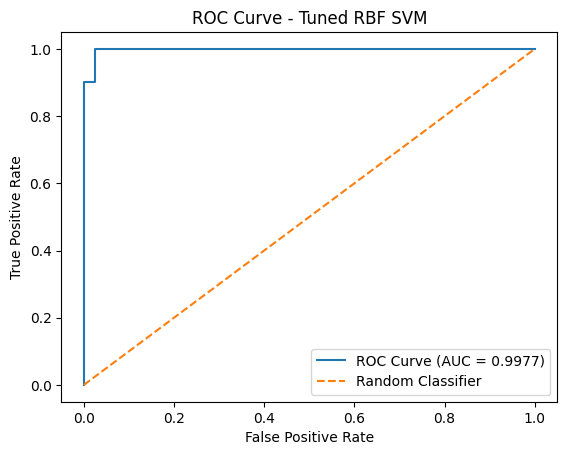

In [29]:
# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Tuned RBF SVM')
plt.legend()
plt.show()

Save tuned model pipeline (scaler + svm) for reuse

In [30]:
# Create pipeline with best parameters
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(
        kernel='rbf',
        C=grid_search.best_params_['C'],
        gamma=grid_search.best_params_['gamma'],
        probability=True,
        random_state=42
    ))
])

# Train pipeline on full training data
final_pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('svm', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,10
,kernel,'rbf'
,degree,3
,gamma,0.01


Save Model using joblib

In [31]:
import joblib

# Save pipeline
joblib.dump(final_pipeline, "svm_breast_cancer_pipeline.pkl")

print("Model saved successfully!")

Model saved successfully!


Load & Reuse Model

In [32]:
# Load saved pipeline
loaded_model = joblib.load("svm_breast_cancer_pipeline.pkl")

# Predict on new/test data
y_pred_loaded = loaded_model.predict(X_test)

print("Loaded model accuracy:", loaded_model.score(X_test, y_test))

Loaded model accuracy: 0.9824561403508771
